# Project: Medical Appointments in Brazil Data Analysis
**Analysis by Felix Ehoneah Naami**
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this project I will be analysing dataset associated with medical appointments in Brazil. The goal of this project will revolve around some of the factors that affect patients' decision to show up or not for a medical appointment. In order to fully understand this, the analysis will address the following questions: 
>
>1. What is the percentage of patient who did not show up for their appointment? 
>2. Does age have an influence on whether or not a patient will show up or not for a medical appointment?
>3. Does having a medical condition affect whether someone shows up or not for an appointment?
>4. Did the SMS messages influenced whether someone showed up for an appointment or not?



In [1]:
#Importing the necessary packages for the analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

Loading in the dataset and to view the different fields and first few records to have a look at the data structure

In [2]:
df = pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Checking the total number of records and fields to have an idea on the amount of data there is in this dataset

In [3]:
df.shape

(110527, 14)

Now that we have identified 110527 records and 14 fields in the dataset, we will check if there are any missing values in the dataset and also investigate the data types for the various fields

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Everything seems okay here except some typo errors for a few of the field names

Checking the minimum and maximum age to see if there are any outliers that need cleaning

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Clearly from the above stats, all the values less than 0 in the Age field needs cleaning. I will leave all the values above 90years to 115years as we have people who live above that age.

Checking the records to see if there are any null values

In [6]:
df.isnull().sum().any()

False

Checking for duplicates in the dataset

In [7]:
sum(df.duplicated())

0

 Clearly there aren't any null or duplicate records in the dataset. The next step will look at cleaning the dataset

### Data Cleaning and Investigation

This step will remove irrelevant fields from the dataset. The focus here is to keep fields that will help in addressing the questions set out in the introduction

In [8]:
df.drop(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood', 'Alcoholism', 'Handcap'], axis = 1, inplace = True)

Now that the fields have been trimmed, let's verify that the code above worked

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Age           110527 non-null  int64 
 1   Scholarship   110527 non-null  int64 
 2   Hipertension  110527 non-null  int64 
 3   Diabetes      110527 non-null  int64 
 4   SMS_received  110527 non-null  int64 
 5   No-show       110527 non-null  object
dtypes: int64(5), object(1)
memory usage: 5.1+ MB


Now that we are left with the relevant fields, we will proceed to correcting the typo errors in the field names

In [10]:
#Correcting "Hipertension"
df.rename(columns={'Hipertension':'Hypertension'}, inplace=True)

In [11]:
#Correcting "No-show"
df.rename(columns={'No-show':'No_show'}, inplace=True)

In [12]:
#Verifying if the code above worked
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Age           110527 non-null  int64 
 1   Scholarship   110527 non-null  int64 
 2   Hypertension  110527 non-null  int64 
 3   Diabetes      110527 non-null  int64 
 4   SMS_received  110527 non-null  int64 
 5   No_show       110527 non-null  object
dtypes: int64(5), object(1)
memory usage: 5.1+ MB


Hipertension now Hypertension and No-show now No_show

Time to clean up all the values less than 0 in the Age field

In [13]:
#Checking the number of records that will be affected in this case
df_age = df.query('Age < 0')
df_age['Age'].count()

1

There is just one record with value less that 0

In [14]:
#Replacing the Age value less than 0 with the mean
df.loc[df['Age'] < 0, 'Age'] = df['Age'].mean()

In [15]:
#Checking that the above syntax worked
df_age = df.query('Age < 0')
df_age['Age'].count()

0

In [16]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.089219,0.098266,0.197246,0.071865,0.321026
std,23.109921,0.297675,0.397921,0.258265,0.466873
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000


Now we have replaced the record with the mean Age

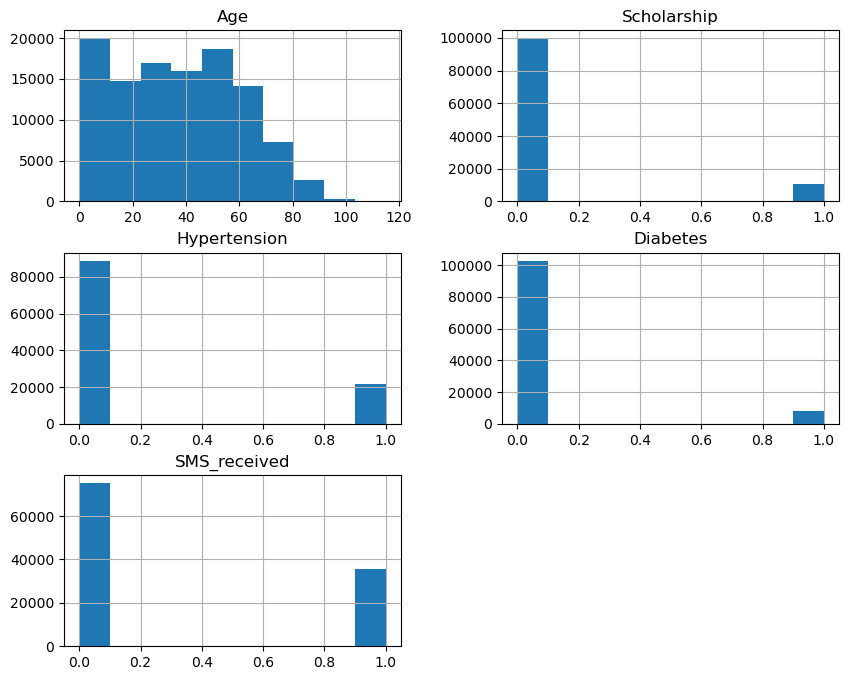

In [17]:
#Now that the dataset is cleaned, would need to check the distributions of the data in the various fields
df.hist(figsize=(10,8));

From the histogram above, the distribution of Age is a bit skewed to the right with majority of the patients ranging between 0 qnd 60 years, and the rest of the dataset have majority of the patients in the nix side of the question

<a id='eda'></a>
## Exploratory Data Analysis

> This section will attempt answering the research questions set out in the introduction

### What is the percentage of patient who did not show up for their appointment

In [18]:
# Creating mask to represent whether a patient will show up for appointment (Present) or will not show up (Absent)
Present = df.No_show == 'No'
Absent = df.No_show == 'Yes'

In [19]:
# Checking the number of patients who did not show up for the appointment
df.No_show.value_counts()

No     88208
Yes    22319
Name: No_show, dtype: int64

In [20]:
# Calculating for the percentage of patients who showed up for the appointment 
Pcounts = df.No_show[Present].count()
totals = df.No_show.count()
P_prop = (Pcounts / totals)*100

In [21]:
# Calculating for the percentage of patients who did not show up for the appointment 
Acounts = df.No_show[Absent].count()
totals = df.No_show.count()
A_prop = (Acounts / totals)*100

In [22]:
#Printing out the results from the above metrics
print(P_prop, A_prop)

79.8067440534892 20.193255946510806


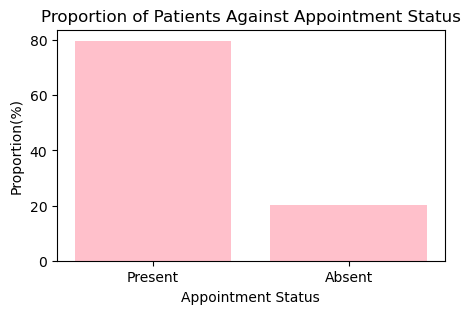

In [23]:
# Showing the distribution on a bar chart
plt.subplots(figsize=(5, 3))
plt.bar([0, 1], [P_prop, A_prop], color='pink', tick_label=['Present', 'Absent'])
plt.title('Proportion of Patients Against Appointment Status')
plt.xlabel('Appointment Status')
plt.ylabel('Proportion(%)');

#### From the above, about 20% of patients did not show up for their medical appointment.

### Does age have an influence on whether or not a patient will show up for a medical appointment?
>These steps will check the probability that a person will show up at an appointment changes with respect to Age

In [24]:
# Calculating the mean Age of patients who is likely to show up for an appointment
df.Age[Present].mean()

37.79049620073249

In [25]:
df.Age[Absent].mean()

34.31766656212196

The average age of a patient who is likely to show up is about 38years and one who is not likely to show up is 34%.
This age bracket is mostly the youth.

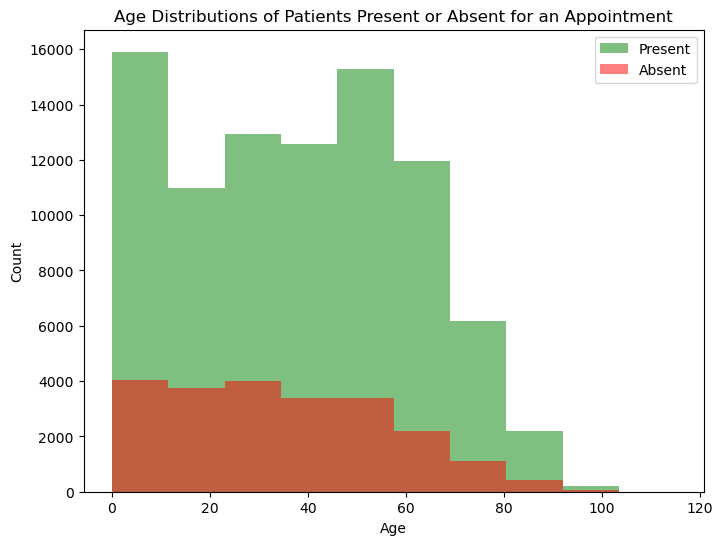

In [26]:
#Below bar chart shows the number of patients for the various age who either showed up or not for the appointment 
fig, ax = plt.subplots(figsize =(8,6))
ax.hist(df.Age[Present], alpha=0.5, color='green', label='Present')
ax.hist(df.Age[Absent], alpha=0.5, color='red', label='Absent')
ax.set_title('Age Distributions of Patients Present or Absent for an Appointment')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.legend(loc='upper right')
plt.show();

#### From the above chart, it clearly shows that irrespective of the age, a patient is likely to show up for an appointment.

### Does having a medical condition affect whether someone shows up for an appointment or not?

> These steps analyze whether having a medical condition had an influence on the patient's decision to attend the appointment or not

In [27]:
# Checking the number of patient with hypertension
df.Hypertension.value_counts()

0    88726
1    21801
Name: Hypertension, dtype: int64

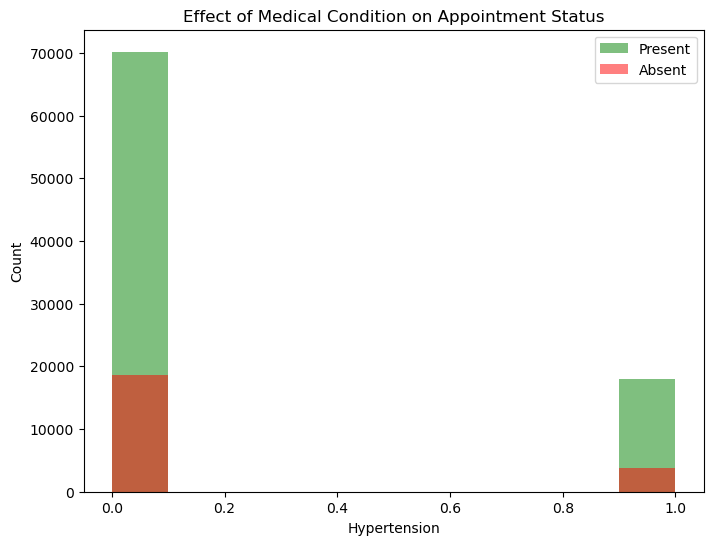

In [28]:
# The total number of patient with hypertension is less than those without hypertension
# The below chart will put these numbers into perspective as in how they affected the patient's decision to attend the appointment or not.
fig, ax = plt.subplots(figsize =(8,6))
ax.hist(df.Hypertension[Present], alpha=0.5, color='green', label='Present')
ax.hist(df.Hypertension[Absent], alpha=0.5, color='red', label='Absent')
ax.set_title('Effect of Medical Condition on Appointment Status')
ax.set_xlabel('Hypertension')
ax.set_ylabel('Count')
ax.legend(loc='upper right')
plt.show();

In [29]:
# Checking the number of patient with diabetes
df.Diabetes.value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

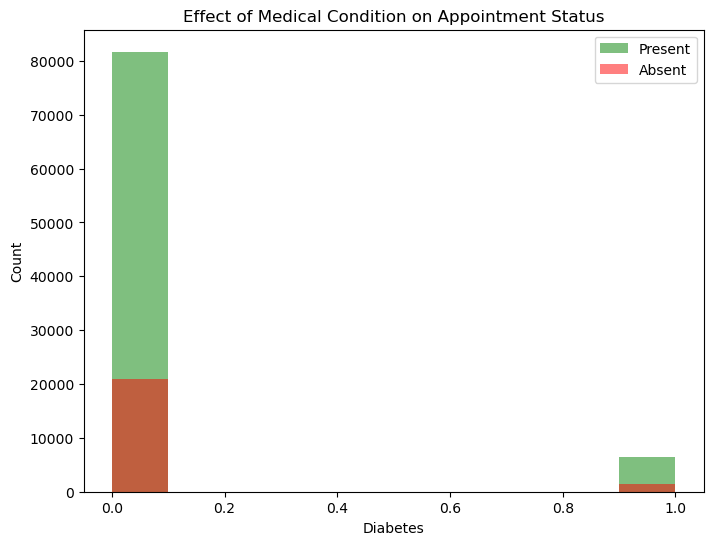

In [30]:
# The total number of patient with diabetes is less than those without diabetes
# The below chart will put these numbers into perspective as in how they affected the patient's decision to attend the appointment or not.
fig, ax = plt.subplots(figsize =(8,6))
ax.hist(df.Diabetes[Present], alpha=0.5, color='green', label='Present')
ax.hist(df.Diabetes[Absent], alpha=0.5, color='red', label='Absent')
ax.set_title('Effect of Medical Condition on Appointment Status')
ax.set_xlabel('Diabetes')
ax.set_ylabel('Count')
ax.legend(loc='upper right')
plt.show();

#### The decision to attend an appointment by a patient was not influenced by their medical conditions. Irrespective of the status of the medical condition, majority attended their appointment.

### Did the SMS messages influenced whether someone showed up for an appointment or not?
> This step will analyze whether sending SMS messages prior to appointment time had an influence in patient's decision to show up for an appointment 

In [31]:
# Checking the number of patient who received or did not receive the SMS
df.SMS_received.value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

The number of patient who did not receive the SMS prior to the appointment time was more than those who received the SMS.
The below chart will put these numbers into perspective as in how they affect the patient's decision to attend the appointment or not.

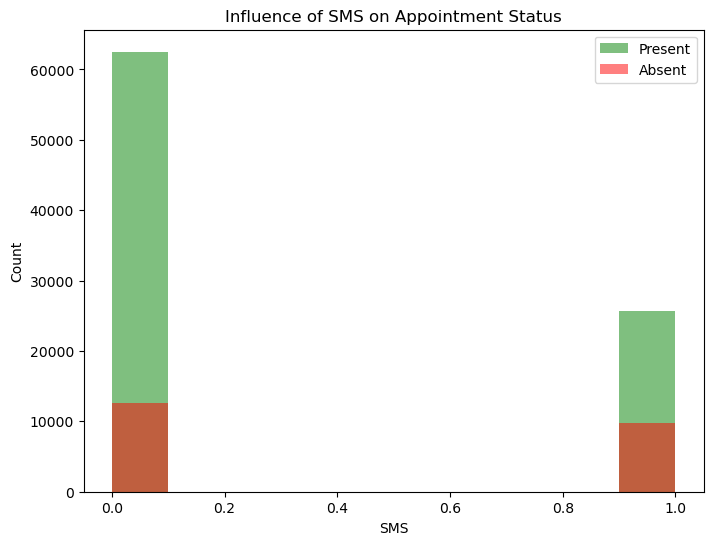

In [32]:
fig, ax = plt.subplots(figsize =(8,6))
ax.hist(df.SMS_received[Present], alpha=0.5, color='green', label='Present')
ax.hist(df.SMS_received[Absent], alpha=0.5, color='red', label='Absent')
ax.set_title('Influence of SMS on Appointment Status')
ax.set_xlabel('SMS')
ax.set_ylabel('Count')
ax.legend(loc='upper right')
plt.show();

#### The decision to attend an appointment by a patient was not influenced by the SMS messages sent to them. Majority of them who received the SMS attended their appointment and in the same vein, majority of them who did not receive SMS also attended the appointment.

<a id='conclusions'></a>
## Conclusions

> This analysis sought to answer the following four questions:
> 1. What is the percentage of patient who did not show up for their appointment?
> 2. Does age have an influence on whether or not a patient will show up or not for a medical appointment?
> 3. Does having a medical condition affect whether someone shows up or not for an appointment?
> 4. Did the SMS messages influenced whether someone showed up for an appointment or not?


Based on the analysis, we can conclude that:
1. About 20% of patients did not show up for their medical appointment
2. The Age did not play a role in remaining 80% decision to show up for their appointment
3. Irrespective of the status of the medical condition of the patient, majority attended their appointment. Clearly this did not have influence on their decision
4. Sending reminders in the form of SMS to patients did little to their decision as the majority of the two sections (those who received an SMS and those who did not receive SMS) attended their appointment 

This analysis has this limitation:
Due to my inexperience, statistical tests were not performed to better predict the influence of the factors provided on the patient's decision to either show up or not for their medical appointment.